In [8]:
import cv2
import pandas as pd
import numpy as np
import marimo
from matplotlib import pyplot as plt

Hier eine detaillierte Erkl√§rung der einzelnen Filter, was sie bewirken und welche Parameter in der **OpenCV-Implementierung** relevant sind:

---

### **1. Sobel Filter**
Der Sobel Filter ist ein Gradient-basierter Filter, der zur **Kantenextraktion** verwendet wird.

- **Funktion**: 
  - Der Sobel-Filter hebt √Ñnderungen in der Intensit√§t hervor und zeigt, wo Kanten im Bild liegen.
  - Es gibt zwei Varianten:
    - **Sobel X**: Findet vertikale Kanten (√Ñnderungen in horizontaler Richtung).
    - **Sobel Y**: Findet horizontale Kanten (√Ñnderungen in vertikaler Richtung).

- **Wichtige Parameter**:
  - **`cv2.CV_64F`**: Datenformat f√ºr die Ausgabe. Hier wird ein 64-Bit-Float verwendet, um negative Werte zuzulassen (Kanten haben positive und negative Intensit√§ten).
  - **`dx` und `dy`**: Geben die Richtung des Gradienten an:
    - `dx=1, dy=0` f√ºr Sobel X.
    - `dx=0, dy=1` f√ºr Sobel Y.
  - **`ksize`**: Gr√∂√üe des Filters (Kernelgr√∂√üe, z. B. \( 3 \times 3 \)). Gr√∂√üere Werte f√ºhren zu glatteren Ergebnissen, k√∂nnen aber kleinere Details verlieren.

---

### **2. Gaussian Filter**
Der Gaussian Filter ist ein **Low-Pass-Filter**, der verwendet wird, um das Bild zu **gl√§tten** und Rauschen zu reduzieren.

- **Funktion**:
  - Gl√§ttet das Bild durch Anwendung eines gewichteten Mittelwerts, wobei Pixel n√§her am Zentrum des Filters st√§rker gewichtet werden.
  - Verwendet eine Gau√üsche Verteilung, um den Filterkernel zu berechnen.

- **Wichtige Parameter**:
  - **`(5, 5)`**: Kernelgr√∂√üe. Hier ein 5x5-Kernel. Gr√∂√üere Kernel f√ºhren zu st√§rkerem Gl√§tten.
  - **`sigmaX`**: Die Standardabweichung der Gau√üschen Verteilung in horizontaler Richtung. Gr√∂√üere Werte f√ºhren zu st√§rkerem Gl√§tten.
  - (Optional: **`sigmaY`**) ‚Äì Falls nicht angegeben, wird `sigmaX` auch f√ºr die vertikale Richtung verwendet.

---

### **3. Box Filter**
Der Box Filter ist ein **Mean Filter**, der den Durchschnitt der Pixelwerte in einem bestimmten Bereich berechnet.

- **Funktion**:
  - Gl√§ttet das Bild durch Berechnung eines einfachen Durchschnitts aller Pixelwerte im Filterkernel.
  - Im Gegensatz zum Gaussian Filter sind alle Pixel im Kernel gleich stark gewichtet.

- **Wichtige Parameter**:
  - **`-1`**: Tiefenwert des Bilds (z. B. Original-Tiefe des Eingabebildes).
  - **`(5, 5)`**: Kernelgr√∂√üe. Hier ein 5x5-Kernel. Gr√∂√üere Kernel f√ºhren zu st√§rkerem Gl√§tten.

---

### **4. Laplacian Filter**
Der Laplacian Filter basiert auf der zweiten Ableitung eines Bildes und dient zur **Erkennung von Kanten und √úberg√§ngen**.

- **Funktion**:
  - Hebt Bereiche hervor, in denen die Intensit√§t sich schnell √§ndert, was oft an Kanten oder √úberg√§ngen geschieht.
  - Kann Kanten in alle Richtungen finden (im Gegensatz zu Sobel, der nur in X- oder Y-Richtung arbeitet).

- **Wichtige Parameter**:
  - **`cv2.CV_64F`**: Datenformat f√ºr die Ausgabe. Da die zweite Ableitung auch negative Werte liefern kann, wird ein 64-Bit-Float verwendet.

---

### **Zusammenfassung der Effekte:**

| **Filter**      | **Effekt**                              | **Verwendung**                                           |
|------------------|-----------------------------------------|---------------------------------------------------------|
| **Sobel X/Y**    | Kanten in X- oder Y-Richtung finden     | Kantenextraktion, Gradientenberechnung                 |
| **Gaussian**     | Gl√§ttung durch gewichteten Mittelwert   | Rauschreduktion, Vorbereitung f√ºr Downsampling         |
| **Box**          | Gleichm√§√üige Gl√§ttung                  | Rauschreduktion, weniger detailliert als Gaussian      |
| **Laplacian**    | Hervorhebung von Kanten (alle Richtungen) | Kantenextraktion, √úbergangserkennung                   |

---

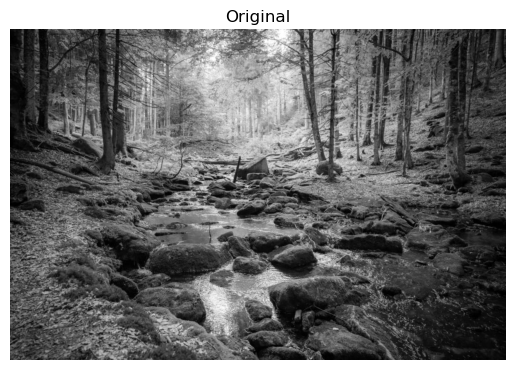

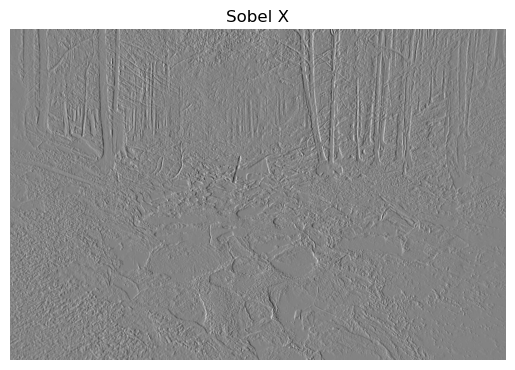

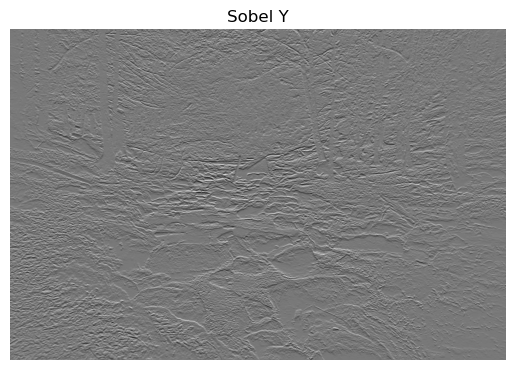

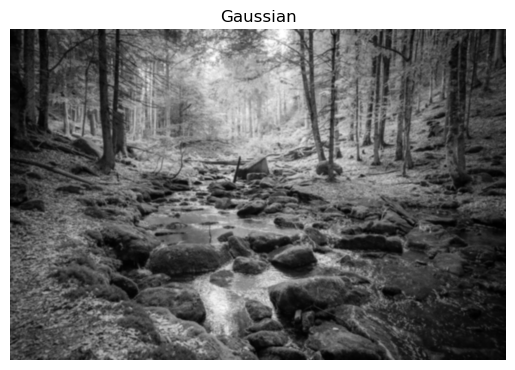

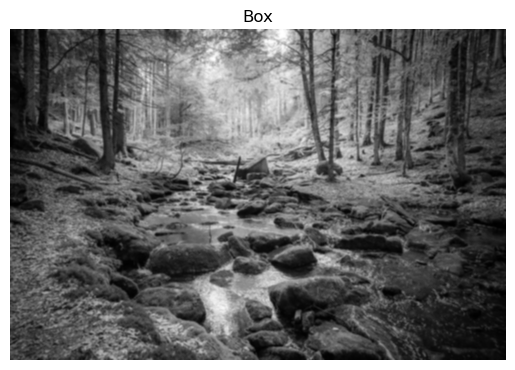

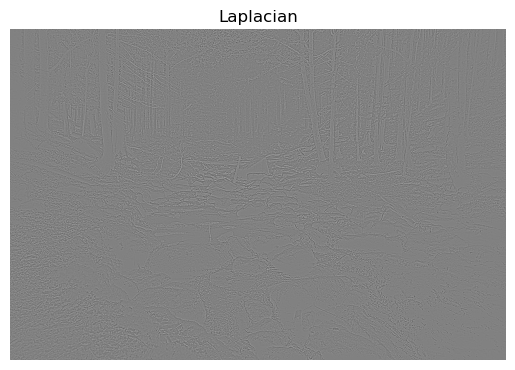

In [9]:

# Bild laden (Graustufen)
image = cv2.imread('nature.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel Filter
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Gaussian Filter
gaussian = cv2.GaussianBlur(image, (5, 5), sigmaX=1.5)

# Box Filter
box = cv2.boxFilter(image, -1, (5, 5))

# Laplacian Filter
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# Ergebnisse anzeigen
filters = {'Original': image, 'Sobel X': sobel_x, 'Sobel Y': sobel_y, 'Gaussian': gaussian, 'Box': box, 'Laplacian': laplacian}

for name, img in filters.items():
    plt.figure()
    plt.title(name)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()


### **Welche Filter sind separable?**

- **Gaussian Filter**: Separable, da die Gau√üfunktion in \( x \)- und \( y \)-Richtung unabh√§ngig ist:
  \[
  G(x, y) = G_x(x) \cdot G_y(y)
  \]

- **Box Filter**: Separable, da alle Werte im Kernel gleich sind:
  \[
  B(x, y) = \frac{1}{n} \cdot \frac{1}{n}
  \]

- **Sobel Filter**: Separable, da es aus einer Differenz und einer Gl√§ttung besteht:
  - Sobel X: \(\begin{bmatrix} -1 & 0 & 1 \end{bmatrix}\) und \(\begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}\)
  - Sobel Y: \(\begin{bmatrix} 1 & 2 & 1 \end{bmatrix}\) und \(\begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}\)

- **Laplacian Filter**: Nicht separable, da es keine Produktdarstellung erlaubt.

---

### **Zusammenfassung**
- **Separable Kernels** erm√∂glichen eine effizientere und speicherschonendere Filterung.
- **Gaussian**, **Box**, und **Sobel** Filter sind separable und k√∂nnen in zwei 1D-Faltungen zerlegt werden.
- **Laplacian** ist nicht separable und muss als vollst√§ndiger 2D-Kernel angewandt werden.
- Eine Implementation mit separable Kernels ist nicht nur schneller, sondern zeigt auch ein tieferes Verst√§ndnis f√ºr die mathematischen Eigenschaften der Filter. üòä

In [3]:
def convolve(image, kernel):
    kernel_height, kernel_width = kernel.shape
    pad_h, pad_w = kernel_height // 2, kernel_width // 2
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            filtered_image[i, j] = np.sum(region * kernel)
    
    return filtered_image

# Sobel-Kerne
sobel_x_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Sobel Filter anwenden
sobel_x = convolve(image, sobel_x_kernel)
sobel_y = convolve(image, sobel_y_kernel)


In [4]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * (ax / sigma) ** 2)
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

gaussian_kernel_5x5 = gaussian_kernel(5, 1.5)
gaussian = convolve(image, gaussian_kernel_5x5)


In [5]:
box_kernel = np.ones((5, 5)) / 25
box = convolve(image, box_kernel)

In [6]:
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian = convolve(image, laplacian_kernel)
